In [1]:
# Observations based on this data set:
# Rides in urban cities are a significant part of the business, bringing in 62.7% of all total fares 
# and being 68.4% of total rides. Suburban cities are the next largest contributor, with 30.5% of total fares and 26.3% total
# rides being from surburban cities. Rural cities make up the remaining percentages. The average fare in a city increases from
# urban, to suburban, to rural cities. The highest average fare in a rural city is over $40, in a suburban city it's over $35
# and in an urban city it's just under $30. However, as the average fare of a city increases, the number of total rides tends 
# to decrease


In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data)
ride_data = pd.read_csv(ride_data)

# Combine the data into a single dataset
all_data = pd.merge(city_data_df, ride_data, on="city")

# Display the data table for preview

all_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

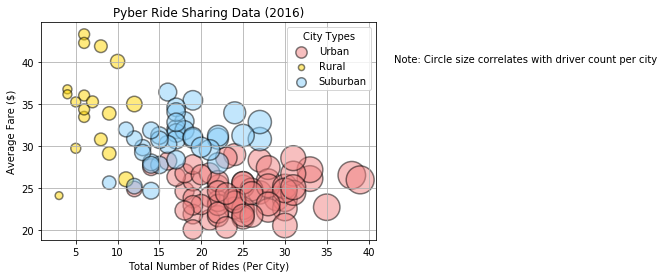

In [3]:
# Obtain the x and y coordinates for each of the three city types
city_grouped = all_data.groupby(['city'])

city_fare_sum = city_grouped['fare'].sum()
city_count = city_grouped['ride_id'].count()
city_drivers = city_grouped['driver_count'].count()
city_fare_avg = np.round(city_fare_sum/city_count, decimals=2)

city_type = city_data_df.set_index('city')['type']

cities_df = pd.DataFrame({"Avg Fare": city_fare_avg,
                        "Number of Rides": city_count,
                         "Number of Drivers": city_drivers,
                         "City Type": city_type})

urban = cities_df.loc[cities_df["City Type"]== "Urban"]
rural = cities_df.loc[cities_df["City Type"]== "Rural"]
suburban = cities_df.loc[cities_df["City Type"]== "Suburban"]

# Build the scatter plots for each city types
plt.scatter(urban["Number of Rides"], urban["Avg Fare"], marker="o", facecolors="lightcoral", edgecolors="black", s=urban["Number of Drivers"]*20, label="Urban", alpha=0.5, linewidths=1.5)
plt.scatter(rural["Number of Rides"], rural["Avg Fare"], marker="o", facecolors="gold", edgecolors="black", s=rural["Number of Drivers"]*20, label="Rural", alpha=0.5, linewidths=1.5)
plt.scatter(suburban["Number of Rides"], suburban["Avg Fare"], marker="o", facecolors="lightskyblue", edgecolors="black", s=suburban["Number of Drivers"]*20, label="Suburban", alpha=0.5, linewidths=1.5)

# Incorporate the other graph properties

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(b=True, axis='both')

# Create a legend

plt.legend(loc= "upper right", markerscale= .5, title="City Types")

# Incorporate a text label regarding circle size

plt.text(43, 40, "Note: Circle size correlates with driver count per city")
# Save Figure
plt.savefig("pyber_bubble_chart")

In [4]:
# Show plot
plt.show()

## Total Fares by City Type

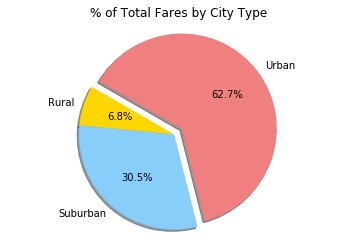

In [5]:
# Calculate Type Percents
fares_city = all_data.groupby(['type'])['fare'].sum()
index = fares_city.index
# Build Pie Chart
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)
plt.pie(fares_city, labels = index, autopct= "%0.1f%%", colors= colors,
        explode= explode, shadow= True, startangle= 150)
plt.axis("equal")
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("pyber_fares_chart")

In [6]:
# Show Figure
plt.show()

## Total Rides by City Type

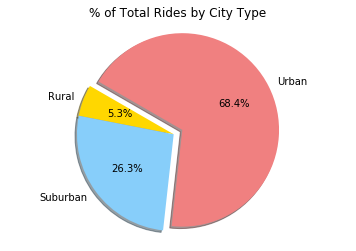

In [7]:
# Calculate Ride Percents
count_type = all_data.groupby(['type'])['ride_id'].count()
index = count_type.index

# Build Pie Chart
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)
plt.pie(count_type, labels = index, autopct= "%0.1f%%", colors= colors,
        explode= explode, shadow= True, startangle= 150)
plt.axis("equal")
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig("pyber_rides_chart")

In [8]:
# Show Figure
plt.show()

## Total Drivers by City Type

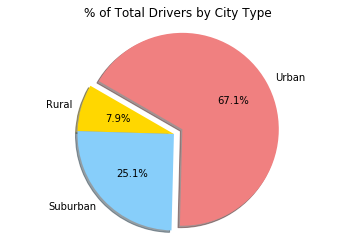

In [9]:
# Calculate Driver Percents
drivers_type = all_data.groupby(['type'])['driver_count'].mean()
index = drivers_type.index

# Build Pie Chart
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)
plt.pie(drivers_type, labels = index, autopct= "%0.1f%%", colors= colors,
        explode= explode, shadow= True, startangle= 150)
plt.axis("equal")
plt.title("% of Total Drivers by City Type")
drivers_type
# Save Figure
plt.savefig("pyber_drivers_chart")

In [10]:
# Show Figure
plt.show()
